# Programs EXPERT

Esta tabla contiene la información a nivel de programa.

## 1 - Obtencion de datos

In [12]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'program__expertise_level'
TARGET_CLASS = 'PROFESSIONAL'
full_table = get_data('programs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for PROFESSIONAL class.")

2025-01-26 11:11:41.200113 Data cache files found ...
2025-01-26 11:11:41.200113 Data cache files successfully loaded!!
The dataset contains 1591 (99.87%) instances for BEGINNER class and 2 (0.1255%) for PROFESSIONAL class.


In [13]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name and features.
TABLE_NAME = 'programs'
TABLE_FEATURES = ['program__has_sub_dirs_with_code','program__has_packages','program__number_of_modules','program__number_of_sub_dirs_with_code','program__number_of_packages','program__class_defs_pct','program__function_defs_pct','program__enum_defs_pct','program__has_code_root_package','program__average_defs_per_module']

# Load features.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

 PROFESSIONAL CLASS Features shape: (2, 10)
As we can see the downloaded data contains a total of 2 instances of PROFESSIONAL. Each of the instances corresponds to a program. For each program we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [14]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   program__has_sub_dirs_with_code        2 non-null      bool   
 1   program__has_packages                  2 non-null      bool   
 2   program__number_of_modules             2 non-null      int64  
 3   program__number_of_sub_dirs_with_code  2 non-null      int64  
 4   program__number_of_packages            2 non-null      int64  
 5   program__class_defs_pct                2 non-null      float64
 6   program__function_defs_pct             2 non-null      float64
 7   program__enum_defs_pct                 2 non-null      float64
 8   program__has_code_root_package         2 non-null      bool   
 9   program__average_defs_per_module       2 non-null      float64
dtypes: bool(3), float64(4), int64(3)
memory usage: 134.0 bytes
None


Cómo podemos ver la tabla está compuesta por 7 variables numéricas, 3 variables boleanas.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [15]:
X.isnull().sum()

program__has_sub_dirs_with_code          0
program__has_packages                    0
program__number_of_modules               0
program__number_of_sub_dirs_with_code    0
program__number_of_packages              0
program__class_defs_pct                  0
program__function_defs_pct               0
program__enum_defs_pct                   0
program__has_code_root_package           0
program__average_defs_per_module         0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [16]:
print_empty_cols(X)

program__has_sub_dirs_with_code
-------------------------------
0 instancias no tienen un valor para la columna program__has_sub_dirs_with_code


program__has_packages
---------------------
0 instancias no tienen un valor para la columna program__has_packages


program__number_of_modules
--------------------------
0 instancias no tienen un valor para la columna program__number_of_modules


program__number_of_sub_dirs_with_code
-------------------------------------
0 instancias no tienen un valor para la columna program__number_of_sub_dirs_with_code


program__number_of_packages
---------------------------
0 instancias no tienen un valor para la columna program__number_of_packages


program__class_defs_pct
-----------------------
0 instancias no tienen un valor para la columna program__class_defs_pct


program__function_defs_pct
--------------------------
0 instancias no tienen un valor para la columna program__function_defs_pct


program__enum_defs_pct
----------------------
0 instanci

### 2.2 - Describimos los valores de las variables de la tabla.

In [17]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
program__has_sub_dirs_with_code,2,1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__has_packages,2,1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__number_of_modules,2.0,NaN,NaN,NaN,2012.0,1813.021787,730.0,1371.0,2012.0,2653.0,3294.0
program__number_of_sub_dirs_with_code,2.0,NaN,NaN,NaN,58.0,14.142136,48.0,53.0,58.0,63.0,68.0
program__number_of_packages,2.0,NaN,NaN,NaN,708.5,832.264681,120.0,414.25,708.5,1002.75,1297.0
program__class_defs_pct,2.0,NaN,NaN,NaN,0.371767,0.003991,0.368945,0.370356,0.371767,0.373178,0.374589
program__function_defs_pct,2.0,NaN,NaN,NaN,0.614788,0.003975,0.611977,0.613383,0.614788,0.616193,0.617599
program__enum_defs_pct,2.0,NaN,NaN,NaN,0.013445,0.007966,0.007812,0.010629,0.013445,0.016261,0.019078
program__has_code_root_package,2,2,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__average_defs_per_module,2.0,NaN,NaN,NaN,2.580751,1.06173,1.829994,2.205372,2.580751,2.956129,3.331507


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

### IMPORTANTE
Revisar programa con 3k modulos y 1k paquetes.

In [18]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "program__class_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "program__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "program__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.19
    "program__number_of_modules": [(1, 1), (2,2), (3,3), (4,inf)],  # min: 1 max: 3294
    "program__number_of_sub_dirs_with_code": [(0, 0), (0, inf)], # min: 0 max: 238
    "program__number_of_packages": [(0, 0), (0, inf)], # min: 0 max: 1297
    "program__average_defs_per_module": [(0, 0), (0, 1), (1, 3), (3, inf)], # min: 0 max: 26    
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code'], 10))
print(get_statistics(X_copy, ['program__has_packages'], 10))
print(get_statistics(X_copy, ['program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct'], 10))
print(get_statistics(X_copy, ['program__function_defs_pct'], 10))
print(get_statistics(X_copy, ['program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code'], 10))
print(get_statistics(X_copy, ['program__number_of_modules'], 10))
print(get_statistics(X_copy, ['program__number_of_packages'], 10))
print(get_statistics(X_copy, ['program__average_defs_per_module'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages'], 10))
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__has_packages', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__function_defs_pct'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__function_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_modules'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_packages'], 10))
print(get_statistics(X_copy, ['program__number_of_modules', 'program__number_of_packages'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))
print(get_statistics(X_copy, ['program__class_defs_pct', 'program__function_defs_pct', 'program__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['program__number_of_sub_dirs_with_code', 'program__number_of_modules', 'program__number_of_packages'], 10))

--- SINGLE FEATURE ---
 program__has_sub_dirs_with_code  count  percentage
                            True      2       100.0

 program__has_packages  count  percentage
                  True      2       100.0

 program__has_code_root_package  count  percentage
                          False      1        50.0
                           True      1        50.0

program__class_defs_pct  count  percentage
              [0.0_inf]      2       100.0

program__function_defs_pct  count  percentage
                 [0.0_1.0)      2       100.0

program__enum_defs_pct  count  percentage
             [0.0_inf]      2       100.0

program__number_of_sub_dirs_with_code  count  percentage
                              [0_inf]      2       100.0

program__number_of_modules  count  percentage
                   [4_inf]      2       100.0

program__number_of_packages  count  percentage
                    [0_inf]      2       100.0

program__average_defs_per_module  count  percentage
             

In [19]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (2, 10)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

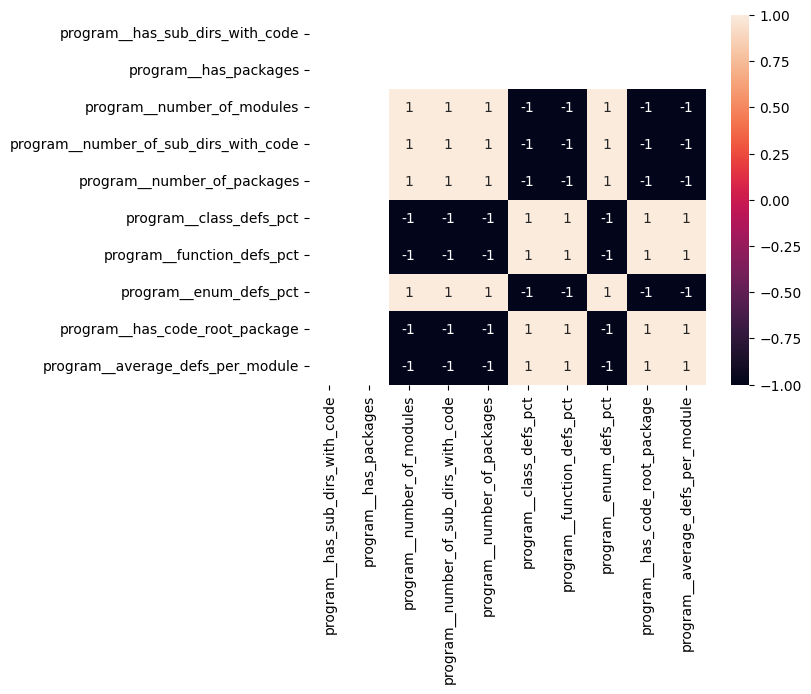

In [20]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado

### Variable has_sub_dirs_with_code (1/10)
Esta variable es de tipo booleano y representa si el programa contiene algún subdirectorio con código.

<Axes: xlabel='program__has_sub_dirs_with_code', ylabel='Count'>

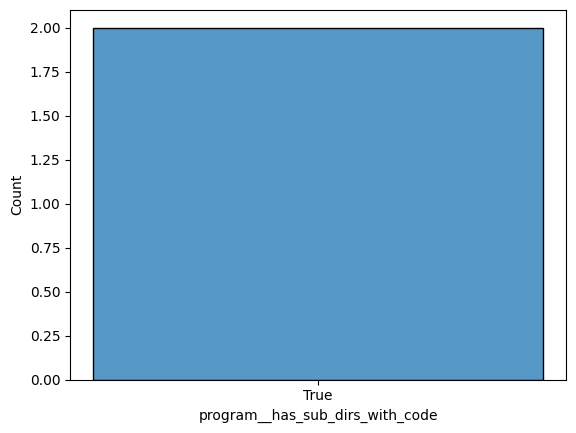

In [21]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_sub_dirs_with_code'], discrete=True)

In [22]:
num_true_values = len(X[X['program__has_sub_dirs_with_code'] == True])
num_false_values = len(X[X['program__has_sub_dirs_with_code'] == False])
std = X['program__has_sub_dirs_with_code'].std()
freq_true = len(X[X['program__has_sub_dirs_with_code'] == True]) / len(X['program__has_sub_dirs_with_code'])
freq_false = len(X[X['program__has_sub_dirs_with_code'] == False]) / len(X['program__has_sub_dirs_with_code'])
print(f'La variable has_sub_dirs_with_code contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a False es {freq_false}.')

La variable has_sub_dirs_with_code contiene 2 valores verdaderos y 0 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a True es 1.0.
La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a False es 0.0.


In [23]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_sub_dirs_with_code', possible_values)

La variable program__has_sub_dirs_with_code contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_sub_dirs_with_code toma el valor de 1.0 en un 100.0% de los items.
La variable program__has_sub_dirs_with_code toma el valor de False en un 0.0% de los items. [OUTLIER]


Describimos los valores de las variables de la tabla, cuando la variable tiene el valor a False.

In [24]:
X[X['program__has_sub_dirs_with_code'] == False].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable has_packages (2/10)
Esta variable es de tipo booleano y representa si el programa contiene algún paquete. 

<Axes: xlabel='program__has_packages', ylabel='Count'>

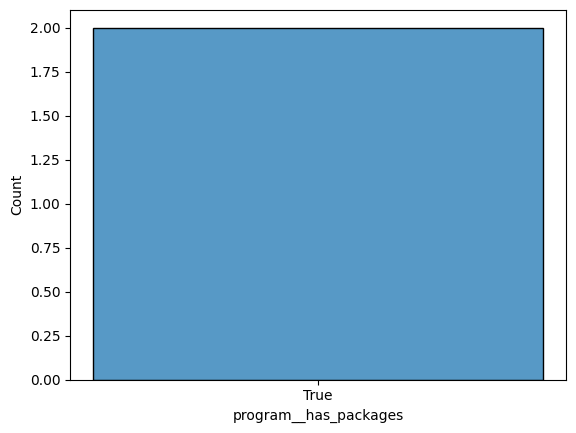

In [25]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_packages'], discrete=True)

In [26]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['program__has_packages'] == True])
num_false_values = len(X[X['program__has_packages'] == False])
std = X['program__has_packages'].std()
freq_true = len(X[X['program__has_packages'] == True]) / len(X['program__has_packages'])
freq_false = len(X[X['program__has_packages'] == False]) / len(X['program__has_packages'])
print(f'La variable program__has_packages contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable program__has_packages a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable program__has_packages a False es {freq_false}.')

La variable program__has_packages contiene 2 valores verdaderos y 0 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable program__has_packages a True es 1.0.
La frecuencia con la que programa puede tener la variable program__has_packages a False es 0.0.


In [27]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_packages', possible_values)

La variable program__has_packages contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_packages toma el valor de 1.0 en un 100.0% de los items.
La variable program__has_packages toma el valor de False en un 0.0% de los items. [OUTLIER]


In [28]:
X[X['program__has_packages'] == False].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable has_code_root_packages (3/10)
Esta variable es de tipo booleano y representa si el programa contiene código en el directorio root.

<Axes: xlabel='program__has_code_root_package', ylabel='Count'>

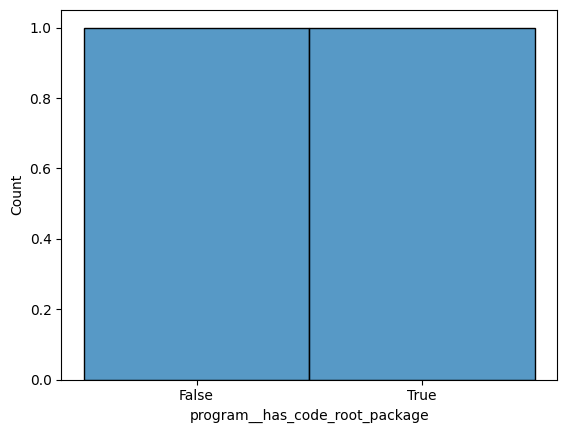

In [29]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['program__has_code_root_package'], discrete=True)

In [30]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['program__has_code_root_package'] == True])
num_false_values = len(X[X['program__has_code_root_package'] == False])
std = X['program__has_code_root_package'].std()
freq_true = len(X[X['program__has_code_root_package'] == True]) / len(X['program__has_code_root_package'])
freq_false = len(X[X['program__has_code_root_package'] == False]) / len(X['program__has_code_root_package'])
print(f'La variable program__has_code_root_package contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable program__has_code_root_package a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable program__has_code_root_package a False es {freq_false}.')

La variable program__has_code_root_package contiene 1 valores verdaderos y 1 valores falsos. Y, la desviación típica es de 0.7071067690849304
La frecuencia con la que programa puede tener la variable program__has_code_root_package a True es 0.5.
La frecuencia con la que programa puede tener la variable program__has_code_root_package a False es 0.5.


In [31]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_code_root_package', possible_values)

La variable program__has_code_root_package contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_code_root_package toma el valor de 0.0 en un 50.0% de los items.
La variable program__has_code_root_package toma el valor de 1.0 en un 50.0% de los items.


In [32]:
X[X['program__has_code_root_package'] == False].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
mean,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
25%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
50%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
75%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
max,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994


### Variable number_of_modules (4/10)
Esta variable es de tipo numérica y nos indica el número de modulos definidos en el programa. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 730 - 3294. Con una media de 2012.

<Axes: ylabel='program__number_of_modules'>

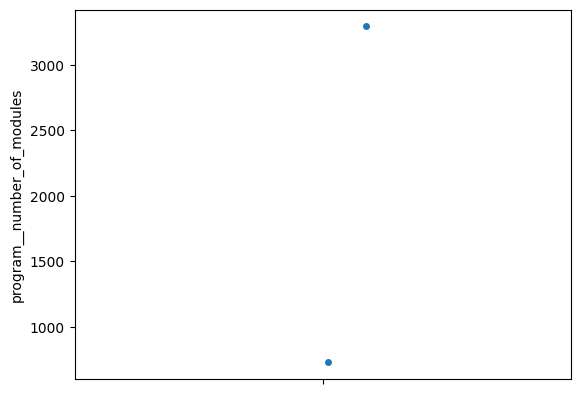

In [33]:
sns.stripplot(X['program__number_of_modules'])

### IMPORTANTE
Los dos valores máximos están muy alejados de los otros.

In [34]:
print_outliers_for_df_column(X, 'program__number_of_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.19527984086992153
Rango valores atípicos extremos (Tukey): [-2475.0,6499.0]
Rango valores atípicos leves (Tukey): [-552.0,4576.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-2828.669493152248,3623.8406081431]
-3.0IQR: 0 instancias tienen un valor para program__number_of_modules inferior a -2475.0 (Q1-3*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_modules inferior a -552.0 (Q1-1.5*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__number_of_modules superior a 4576.0 (Q3+1.5*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__number_of_modules superior a 6499.0 (Q3-3*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
L:

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 3623 (Con un MC de -0.19 usamos U)

In [35]:
X[X['program__number_of_modules'] > 3623].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
mean,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
25%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
50%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
75%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
max,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994


### Variable number_of_sub_dirs_with_code (5/10)
Esta variable representa el número de subdirectorios con ficheros python pero sin un __init__.py en ellos. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 48 - 68. Con una media de 58.

<Axes: ylabel='program__number_of_sub_dirs_with_code'>

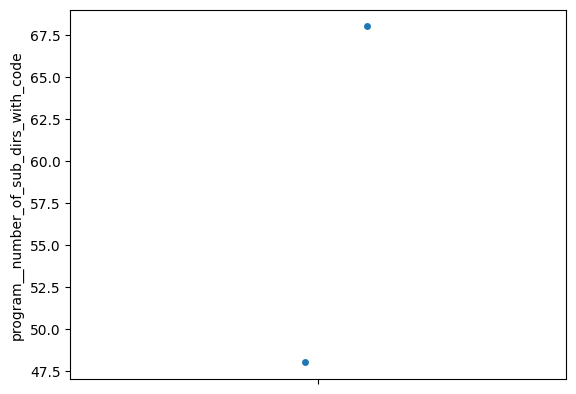

In [36]:
sns.stripplot(X['program__number_of_sub_dirs_with_code'])

El valor máximo está muy alejado del siguiente. 

In [37]:
print_outliers_for_df_column(X, 'program__number_of_sub_dirs_with_code')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.5179076186194074
Rango valores atípicos extremos (Tukey): [23.0,93.0]
Rango valores atípicos leves (Tukey): [38.0,78.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-66.06632318907215,65.44825012808147]
-3.0IQR: 0 instancias tienen un valor para program__number_of_sub_dirs_with_code inferior a 23.0 (Q1-3*IQR) para program__number_of_sub_dirs_with_code. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_sub_dirs_with_code inferior a 38.0 (Q1-1.5*IQR) para program__number_of_sub_dirs_with_code. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__number_of_sub_dirs_with_code superior a 78.0 (Q3+1.5*IQR) para program__number_of_sub_dirs_with_code. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__number_of_sub_dirs_with_code superior a 93.0 (Q3-3*IQR) para program__number_o

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 65 (Con un MC de -0.51 usamos U)

In [57]:
X[X['program__number_of_sub_dirs_with_code'] > 65].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
mean,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
25%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
50%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
75%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
max,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994


### Variable number_of_packages (6/10)
Esta variable representa el número de subdirectorios con ficheros python pero sin un __init__.py en ellos. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 120 - 1297. Con una media de 708,5.

<Axes: ylabel='program__number_of_packages'>

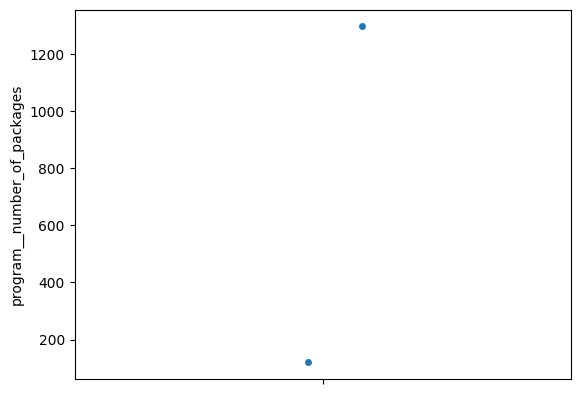

In [39]:
sns.stripplot(X['program__number_of_packages'])

In [40]:
print_outliers_for_df_column(X, 'program__number_of_packages')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.09111969111969112
Rango valores atípicos extremos (Tukey): [-1351.25,2768.25]
Rango valores atípicos leves (Tukey): [-468.5,1885.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-856.701103152895,1644.4514188856836]
-3.0IQR: 0 instancias tienen un valor para program__number_of_packages inferior a -1351.25 (Q1-3*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_packages inferior a -468.5 (Q1-1.5*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__number_of_packages superior a 1885.5 (Q3+1.5*IQR) para program__number_of_packages. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__number_of_packages superior a 2768.25 (Q3-3*IQR) para program__number_of_packages. Representando un 0.0% del total de 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1644 (Con un MC de -0.09 usamos U)

In [58]:
X[X['program__number_of_packages'] > 1644].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable average_defs_per_module (7/10)
Esta variable es de tipo numérica y nos indica el número medio de definiciones en un módulo. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1.82 - 3.33. Con una media de 2.58.

<Axes: ylabel='program__average_defs_per_module'>

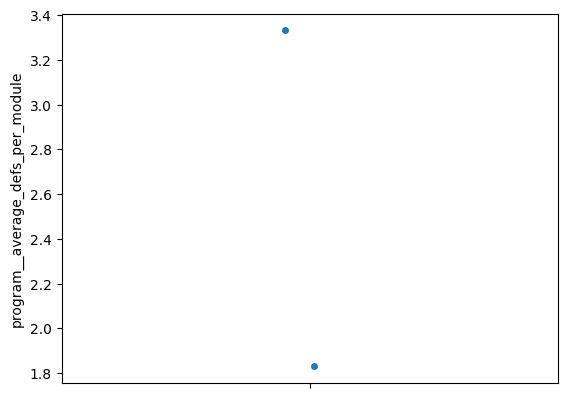

In [42]:
sns.stripplot(X['program__average_defs_per_module'])

In [43]:
print_outliers_for_df_column(X, 'program__average_defs_per_module')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.08654720161779227
Rango valores atípicos extremos (Tukey): [-0.046897292137145996,5.208398222923279]
Rango valores atípicos leves (Tukey): [1.079237461090088,4.082263469696045]
Rango valores atípicos extremos (Fixed BoxPlot): [0.6133898601459158,3.7879613593015042]
-3.0IQR: 0 instancias tienen un valor para program__average_defs_per_module inferior a -0.046897292137145996 (Q1-3*IQR) para program__average_defs_per_module. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__average_defs_per_module inferior a 1.079237461090088 (Q1-1.5*IQR) para program__average_defs_per_module. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__average_defs_per_module superior a 4.082263469696045 (Q3+1.5*IQR) para program__average_defs_per_module. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__average

Describimos los valores de las variables de la tabla, cuando el valor de la variable es menor que 3.78 (Con un MC de -0.086 usamos U)

In [44]:
X[X['program__average_defs_per_module'] < 3.78].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable class_defs_pct (8/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.3689 - 0.3745. Con una media de 0.3717.

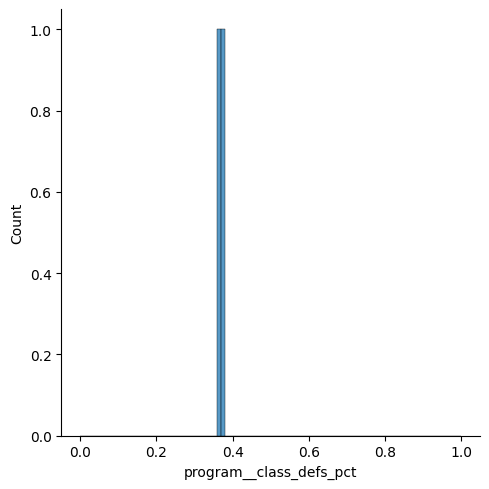

In [45]:
sns.displot(X['program__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [46]:
print_outliers_for_df_column(X, 'program__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.0
Rango valores atípicos extremos (Tukey): [0.3618900328874588,0.38164369761943817]
Rango valores atípicos leves (Tukey): [0.3661229610443115,0.37741076946258545]
Rango valores atípicos extremos (Fixed BoxPlot): [0.3661229610443115,0.37741076946258545]
-3.0IQR: 0 instancias tienen un valor para program__class_defs_pct inferior a 0.3618900328874588 (Q1-3*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__class_defs_pct inferior a 0.3661229610443115 (Q1-1.5*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__class_defs_pct superior a 0.37741076946258545 (Q3+1.5*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__class_defs_pct superior a 0.38164369761943817 (Q3-3*IQR) para program__clas

No hace falta analizar los valores que estan en los extremos, ya que no hay valores que se salgan de la distribución.

In [47]:
X[X['program__class_defs_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.0,1.0,2012.000000,58.000000,708.500000,0.371767,0.614788,0.013445,0.500000,2.580750
std,0.0,0.0,1813.021729,14.142136,832.264709,0.003991,0.003975,0.007966,0.707107,1.061730
min,1.0,1.0,730.000000,48.000000,120.000000,0.368945,0.611977,0.007812,0.000000,1.829994
25%,1.0,1.0,1371.000000,53.000000,414.250000,0.370356,0.613383,0.010629,0.250000,2.205372
50%,1.0,1.0,2012.000000,58.000000,708.500000,0.371767,0.614788,0.013445,0.500000,2.580750
75%,1.0,1.0,2653.000000,63.000000,1002.750000,0.373178,0.616193,0.016261,0.750000,2.956129
max,1.0,1.0,3294.000000,68.000000,1297.000000,0.374589,0.617599,0.019078,1.000000,3.331507


### Variable function_defs_pct (9/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.612 - 0.617. Con una media de 0,6148.


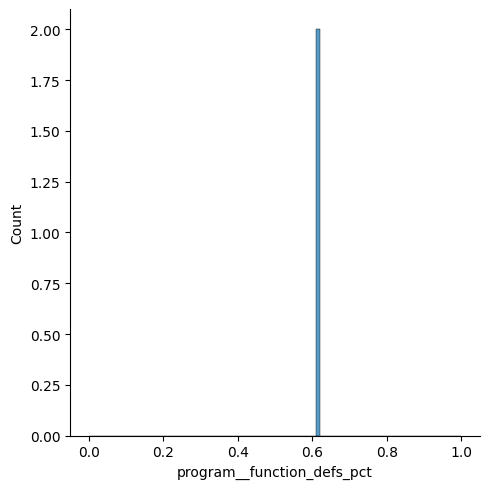

In [48]:
sns.displot(X['program__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [49]:
print_outliers_for_df_column(X, 'program__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 7.952581407925012e-06
Rango valores atípicos extremos (Tukey): [0.6049508899450302,0.6246252804994583]
Rango valores atípicos leves (Tukey): [0.609166830778122,0.6204093396663666]
Rango valores atípicos extremos (Fixed BoxPlot): [0.6091669481231332,0.6204094737789504]
-3.0IQR: 0 instancias tienen un valor para program__function_defs_pct inferior a 0.6049508899450302 (Q1-3*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__function_defs_pct inferior a 0.609166830778122 (Q1-1.5*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__function_defs_pct superior a 0.6204093396663666 (Q3+1.5*IQR) para program__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__function_defs_pct superior a 0.62462528049945

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.62 (Con un MC de 8 usamos U)

In [50]:
X[X['program__function_defs_pct'] > 0.62].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable enum_defs_pct (10/10)
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0078 - 0.019. Con un maximo de 0.013

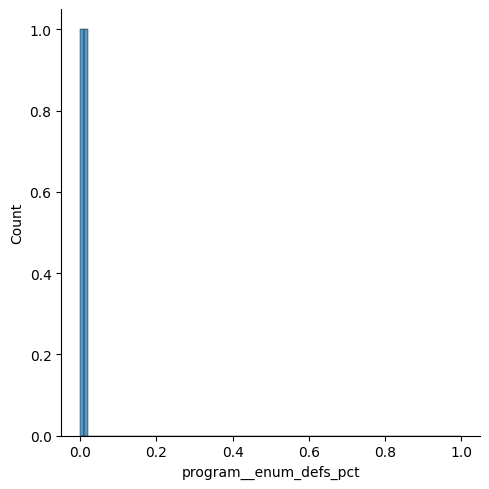

In [51]:
sns.displot(X['program__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [52]:
print_outliers_for_df_column(X, 'program__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.0
Rango valores atípicos extremos (Tukey): [-0.006268922705203295,0.03315906086936593]
Rango valores atípicos leves (Tukey): [0.002179930917918682,0.024710207246243954]
Rango valores atípicos extremos (Fixed BoxPlot): [0.002179930917918682,0.024710207246243954]
-3.0IQR: 0 instancias tienen un valor para program__enum_defs_pct inferior a -0.006268922705203295 (Q1-3*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__enum_defs_pct inferior a 0.002179930917918682 (Q1-1.5*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para program__enum_defs_pct superior a 0.024710207246243954 (Q3+1.5*IQR) para program__enum_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para program__enum_defs_pct superior a 0.03315906086936593 (Q3-3*IQR) para progr

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0247 (Con un MC de 0 usamos U)

In [53]:
X[X['program__enum_defs_pct'] > 0.0247].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module
count,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
mean,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
25%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
50%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
75%,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994
max,1.0,1.0,3294.0,68.0,1297.0,0.368945,0.611977,0.019078,0.0,1.829994


### IMPORTANTE

Hay 1 programa que tiene un porcentaje de definiciones de enumerados muy elevado, comparado con el resto.

## Multivariate

Isolation forest algorithm

In [54]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,program__program_id,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module,program__expertise_level


### IMPORTANTE
Analizar el programa

In [55]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
program__has_sub_dirs_with_code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__has_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__number_of_modules,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__number_of_sub_dirs_with_code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__number_of_packages,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__class_defs_pct,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__function_defs_pct,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__enum_defs_pct,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__has_code_root_package,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__average_defs_per_module,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
program__has_sub_dirs_with_code,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
program__has_packages,2.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
program__number_of_modules,2.0,2012.000000,1813.021729,730.000000,1371.000000,2012.000000,2653.000000,3294.000000
program__number_of_sub_dirs_with_code,2.0,58.000000,14.142136,48.000000,53.000000,58.000000,63.000000,68.000000
program__number_of_packages,2.0,708.500000,832.264709,120.000000,414.250000,708.500000,1002.750000,1297.000000
program__class_defs_pct,2.0,0.371767,0.003991,0.368945,0.370356,0.371767,0.373178,0.374589
program__function_defs_pct,2.0,0.614788,0.003975,0.611977,0.613383,0.614788,0.616193,0.617599
program__enum_defs_pct,2.0,0.013445,0.007966,0.007812,0.010629,0.013445,0.016261,0.019078
program__has_code_root_package,2.0,0.500000,0.707107,0.000000,0.250000,0.500000,0.750000,1.000000
program__average_defs_per_module,2.0,2.580750,1.061730,1.829994,2.205372,2.580750,2.956129,3.331507
